# **Project : Iris Data Analysis in R**

Let's imagine that you are the new bioinformatician in **Charles Darwin**'s laboratory.

Charles Darwin's laboratory is one of the most recognized laboratories that seeks to make contributions in the biological field. 

Recently, researchers in the field have been filling in information about 3 species of Iris flowers that seem to be related.

There are so many questions related to these flowers that need to be elucidated.  

Among them, 
* how to characterize each species? 
* is it possible to quantify the morphological variation of Iris flowers? 
* is it possible to verify the similarity of such species? 
* is it possible to quickly identify the specie of a given flower?

You are the one entrusted to provide answers to these questions. Hence, you are expected to produce a descriptive analysis (or an exploratory data analysis) of the measured traits. 

This is what you will do, using R, in this 2-hours project. 

***Before we begin, what is R exactly?***

[R](https://cran.r-project.org) is a statistical programming language.  It is interactive and the code is evaluated as you write it.  

Even if an interactive console is available, it's a good practice to write your code in a script that you can save (and reuse).

Today, we are using Google Colab to write code (it's easy to share), but other options exist. I frequently use [RStudio](https://rstudio.com) and [Jupyter Notebooks](https://jupyter.org) with a R kernel as well.  

<br/>
<center>
<img src='https://d33wubrfki0l68.cloudfront.net/692f3658d35df168276cf46e3e083f908a5cc105/f7707/wp-content/uploads/2014/04/rstudio-windows.png' width='300'>

<img src='https://www.tutorialspoint.com/jupyter/images/jupyter_notebook_r_kernel.jpg' width='300'>
<br/>

<figcaption><b>Figure1.</b>RStudio and Jupyter Notebook</figcaption>
</center>


# **Iris Dataset**

The Iris data set consists of four features measured for a number of flowers beloinging to three species of Iris: Iris setosa, Iris virginica and Iris versicolor.  The measured features are: the length and the width of the sepals and petals, in centimeters.
<br/>

<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg' width=200/>

<img src='https://miro.medium.com/max/362/1*XN85Vu-SmkJc3TkwgTx5Kw.jpeg' width=150/>
<figcaption><b>Figure2</b>. Iris versicolor on the left. The Iris dataset measured features consist of the widths and lengths of the sepals and petals</figcaption>
</center>

Since it's a very famous dataset, you can learn more about it on its [Wikipedia's page](https://en.wikipedia.org/wiki/Iris_flower_data_set). 


# **Loading the Iris data set into R**
There are several ways to load input data into R.  If you are using RStudio, you can even load data via the graphical user interface (GUI). 
But the simplest way is to use R's available *functions* for data imports.

*Functions? What is a function?*

Functions consist of code that has been written to perform one or several actions on data.  Functions are a way to store code, allowing to reuse it later and avoiding rewritting always the same thing.

R contains basic functions that are part of the core language. Additional functions are available in packages or libraries.  And there are a lot of packages available, so we are lucky! We can also create our own functions!

To use a function on data, you call it with your input (e.g. table, image, numbers, collections). It will do some transformations/operations on this input and return an output.

*Packages? What is a package?*

A package (library) can be seen as a collection of pre-written code (and sometimes pre-organized data) that you can easily access and use.  A package will usually offer different functions.

If you have used Excel in the past, you already know what a function is.  Have you ever computed an average or looked for a value in a column with vlookup?

A function has a name (for example, vlookup) and you call it like this:
`function(arguments)` (for example, in Excel, `=vlookup(A1, B1:J20, 1, FALSE)`)


In [ ]:
# We want to use the library data.table to load the data 
# To use a package's function, we first need to import it in our
# working environment
library(data.table)

# Load the iris dataset and save it in the variable named 'iris_df'
# A variable is a named area in the computer memory in which a value is stored
# Here we would like to store the content of Iris_data_set.csv into 'iris_df'
uri <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_df <- fread(uri)

ERROR: ignored

## **Setup**

Since we are working in Colab, the packages are not installed by default. We need to install them.  So, we begin by installing the packages we will need later

In [ ]:
# If a library/package is not available, we need to install it. 
# Note that RStudio helps you manage package via its graphical user interface
# By default, R installs package from the CRAN repository 
install.packages(c('dplyr', 'ggplot2', 'data.table', 'reshape', 'cowplot', 'devtools'))
install.packages(c('rpart', 'rpart.plot'))

# This package is special and is only available from github
# We use a special function to install it
library(devtools)
install_github("vqv/ggbiplot")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: usethis




rlang (0.4.9 -> 0.4.10) [CRAN]


Installing 1 packages: rlang

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmphVwdIP/remotes3849d1e80b/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




## **Get the Iris Dataset**

In [ ]:
# R contains a core function to load .txt or .csv files.
# For big files, it is however slower than the function from data.table
uri <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris <- read.csv(uri, header=FALSE)
colnames(iris) <- c('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species')

In [ ]:
# However, since this dataset is so famous, it is already available in R. 
# We will use R's available version.
# We can load it using the function 'data()' with the name of the dataset 
data(iris)

# **Data exploration**

In [ ]:
# It's a good practice to (often) look at the data we are working with.
# Especially, if we just imported it.  It avoids unexpected surprises.
# We can use the function 'head()' to see the first rows or 'tail()' to see the last rows
head(iris,3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [ ]:
# Or we can slice/index the dataframe directly without using the function head()
iris[1:3,]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [ ]:
# We use the function 'head()' to show the first 6 rows
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [ ]:
# Let's get the shape (number of dimensions) of our data set using the function 'dim()'
print("Shape of the iris data set")
print(dim(iris))

[1] "Shape of the iris data set"
[1] 150   5


In [ ]:
# Let's get the shape of our data set
# Nicer print statement using the function 'sprintf()'
shape <- dim(iris)
print(sprintf("Shape of the iris data set: [%s,%s]",shape[1], shape[2] ))

[1] "Shape of the iris data set: [150,5]"


In [ ]:
# Let's get some statistics about the data with the function 'summary()'
print(summary(iris))

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                


In [ ]:
# Let's see how many examples we have of each specie
print("Number of samples per specie")
# iris[,'Species'] returns only the values in the column 'Species'
print(table(iris[,'Species']))

[1] "Number of samples per specie"

    setosa versicolor  virginica 
        50         50         50 


In [ ]:
# We could have written this on several lines 
# to be able to validate each step 
species <- iris[,'Species']
output <- table(species)

print("Number of samples per specie")
print(output)

[1] "Number of samples per specie"
species
    setosa versicolor  virginica 
        50         50         50 


In [ ]:
# We can also use the package dplyr to derive the same information
library(dplyr)

# This package introduces a specific syntax using pipes, %>% 
# It can be seen as a flow from left to right
# The output of one step is the input of the following step
iris %>% group_by(Species) %>% summarise(N=n())


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


`summarise()` ungrouping output (override with `.groups` argument)



Species,N
<fct>,<int>
setosa,50
versicolor,50
virginica,50


In [ ]:
# We can also inspect the variable iris using the function 'str()'
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
# Any time, we can ask for help to know more about a function using ? or 'help()'
?dim


For now, we don't know much about the flowers.  
First, let's get an overall view.  What are the features of the Iris flowers?  

That's where the analysis starts!

**Calculating the mean and the median of a particular feature**


In [ ]:
# Compute the mean and the median for a particular feature (for all flowers)
# We use the function mean() and the function median()
# We select only the column containing the data we need doing iris[,<column_name>]
# We can do the same for rows. iris[1,] gives the first row 

mean_sepal_width <- mean(iris[,"Sepal.Width"])
median_sepal_width <- median(iris[,"Sepal.Width"])
cat(sprintf( "Mean Sepal Width: %s \nMedian Sepal Width: %s\n\n", mean_sepal_width, median_sepal_width))


mean_sepal_length <- mean(iris[,"Sepal.Length"])
median_sepal_length <- median(iris[,"Sepal.Length"])
cat(sprintf( "Mean Sepal Length: %s \nMedian Sepal Length: %s", mean_sepal_length, median_sepal_length))


Mean Sepal Width: 3.05733333333333 
Median Sepal Width: 3

Mean Sepal Length: 5.84333333333333 
Median Sepal Length: 5.8

In [ ]:
# Your turn!!
# Compute the mean and the median for a particular feature (for all flowers)
# Fill in the '.....'
mean_petal_width <- mean(iris[,"Petal.Width"])
median_petal_width <- .....
cat(sprintf( "Mean Petal Width: %s \nMedian Petal Width: %s\n\n", mean_petal_width, .....))


mean_petal_length <- .....
median_petal_length <- .....
cat(sprintf(.....))


ERROR: ignored

In [ ]:
# Compute the mean and the median for a particular feature (for all flowers)

mean_sepal_width <- mean(iris[,"Sepal.Width"])
median_sepal_width <- median(iris[,"Sepal.Width"])
cat(sprintf( "Mean Sepal Width: %s \nMedian Sepal Width: %s\n\n", mean_sepal_width, median_sepal_width))

mean_sepal_length <- mean(iris[,"Sepal.Length"])
median_sepal_length <- median(iris[,"Sepal.Length"])
cat(sprintf( "Mean Sepal Length: %s \nMedian Sepal Length: %s", mean_sepal_length, median_sepal_length))

mean_petal_width <- mean(iris[,"Petal.Width"])
median_petal_width <- median(iris[,"Petal.Width"])
cat(sprintf( "Mean Petal Width: %s \nMedian Petal Width: %s\n\n", mean_petal_width, median_petal_width))

mean_petal_width <- mean(iris[,"Petal.Length"])
median_petal_width <- median(iris[,"Petal.Length"])
cat(sprintf( "Mean Petal Length: %s \nMedian Petal Length: %s\n\n", mean_petal_length, median_petal_length))

Mean Sepal Width: 3.05733333333333 
Median Sepal Width: 3

Mean Sepal Length: 5.84333333333333 
Median Sepal Length: 5.8Mean Petal Width: 1.19933333333333 
Median Petal Width: 1.3



ERROR: ignored

What if you wanted to display only 2 digits after the point for the printed mean and median values?



In [ ]:
# Compute the mean and the median for a particular feature (for all flowers)
# Change %s for %.2f to format the value as a float with two decimals

mean_sepal_width <- mean(iris[,"Sepal.Width"])
median_sepal_width <- median(iris[,"Sepal.Width"])
cat(sprintf( "Mean Sepal Width: %s \nMedian Sepal Width: %s\n\n", mean_sepal_width, median_sepal_width))

mean_sepal_length <- mean(iris[,"Sepal.Length"])
median_sepal_length <- median(iris[,"Sepal.Length"])
cat(sprintf( "Mean Sepal Length: %s \nMedian Sepal Length: %s", mean_sepal_length, median_sepal_length))

mean_petal_width <- mean(iris[,"Petal.Width"])
median_petal_width <- median(iris[,"Petal.Width"])
cat(sprintf( "Mean Petal Width: %s \nMedian Petal Width: %s\n\n", mean_petal_width, median_petal_width))

mean_petal_length <- mean(iris[,"Petal.Length"])
median_petal_length <- median(iris[,"Petal.Length"])
cat(sprintf( "Mean Petal Length: %s \nMedian Petal Length: %s\n\n", mean_petal_length, median_petal_length))

Mean Sepal Width: 3.05733333333333 
Median Sepal Width: 3

Mean Sepal Length: 5.84333333333333 
Median Sepal Length: 5.8Mean Petal Width: 1.19933333333333 
Median Petal Width: 1.3

Mean Petal Length: 3.758 
Median Petal Length: 4.35



How many modifications do you have to make?

You need to modify 4 times the same statement as it was copied/pasted 4 times. And there are 2 %s in the statement, so 8 modifications in total.

Did you forget one?  What if you have 30 features there?

In [ ]:
# You can create a function to avoid code repetition.
# Avoiding code repetition reduces the risk of errors and add consistency.
# It is also more time efficient since you don't always rewrite the same lines of code.

# It's easy to make errors in copy/paste steps.
# It's easy to forget to modify all the places where the same code is repeated.
# Creating functions follows this syntax :

# function_name <- function(arguments) { code }
# Then, we can call it using function_name(arguments)

compute_mean_and_median <- function(df, feature_name) {
    mean_val <- mean(df[,feature_name])
    median_val <- median(df[,feature_name])
    cat(sprintf( "Mean %s: %.2f \nMedian %s: %.2f \n\n", feature_name, mean_val, feature_name,  median_val))
}

compute_mean_and_median(iris, 'Sepal.Width')
compute_mean_and_median(iris, 'Sepal.Length')
compute_mean_and_median(iris, 'Petal.Width')
compute_mean_and_median(iris, 'Petal.Length')



Mean Sepal.Width: 3.06 
Median Sepal.Width: 3.00 

Mean Sepal.Length: 5.84 
Median Sepal.Length: 5.80 

Mean Petal.Width: 1.20 
Median Petal.Width: 1.30 

Mean Petal.Length: 3.76 
Median Petal.Length: 4.35 



### <strong> Observations </strong> 

What can you conclude from this first part?

From our exploration, we know that we have 50 flowers per specie in the dataset, for a total of 150 samples.  

We also learned that we have four numerical measures for each flower plus its class. There are three classes (setosa, versicolor, virginica).

From the mean and median, we saw that petals are smaller segments than the sepals. This is to be expected, since sepals are modified leaves that wrap around the developing flower.

#**More data exploration**



## <b>Visualization of the distribution of the features for all species</b>

Graphs are really useful for data exploration.
Humans are good at visual interpretation and graphs can present several information at the same time.

We have just computed the mean and the median of the sepals and petals width and length for all the flowers.  These numbers are not sufficient to fully describe the data we are working with.  We are interested in knowing more about the distribution of these features.

In this sense, it is relevant to first create some visualizations. 

1. Distribution of sepal width for all species
2. Distribution of sepal length for all species
3. Distribution of petal width for all species
4. Distribution of petal length for all species

Distribution plots are used to visually assess how a given flower feature is distributed with respect to its frequency.





### **Distribution of sepal width for all species**

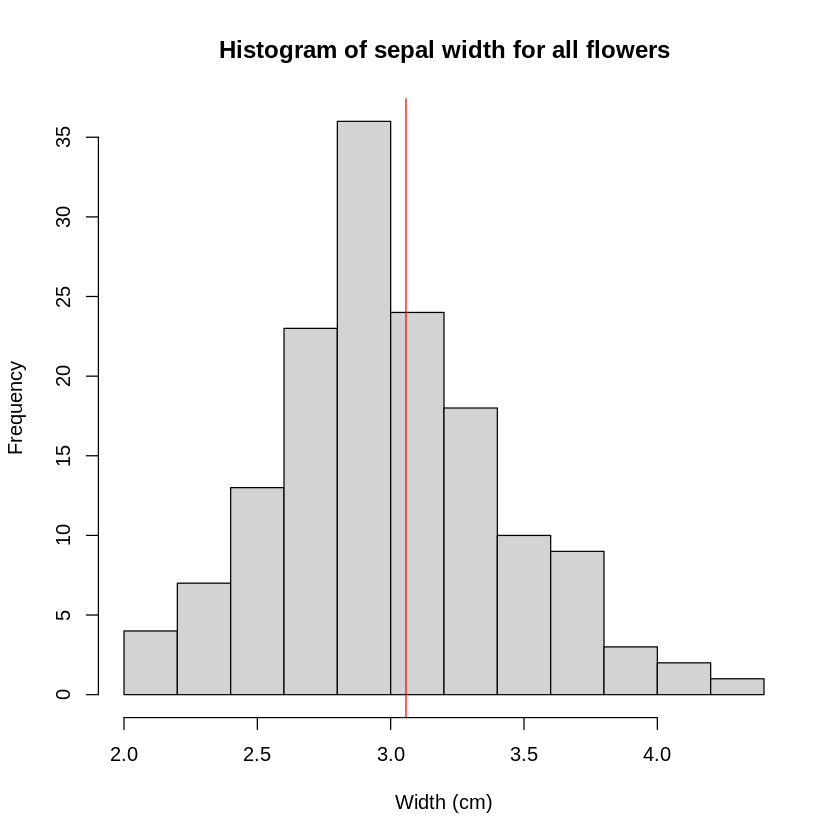

In [ ]:
# To make a visualisation in R, we can use the core plotting functions of R.
# A histogram shows the underlying frequency distribution. We use the function 'hist()'  

hist(iris[,'Sepal.Width'], main='Histogram of sepal width for all flowers', xlab='Width (cm)')
abline(v=mean_sepal_width, col='red') # remember, we calculated mean_sepal_width earlier

In [ ]:
# To know which arguments the function 'hist()' is expecting (and in the meantime, what can be customized on the graph), we can use the help function
help(hist)
# or 
?help

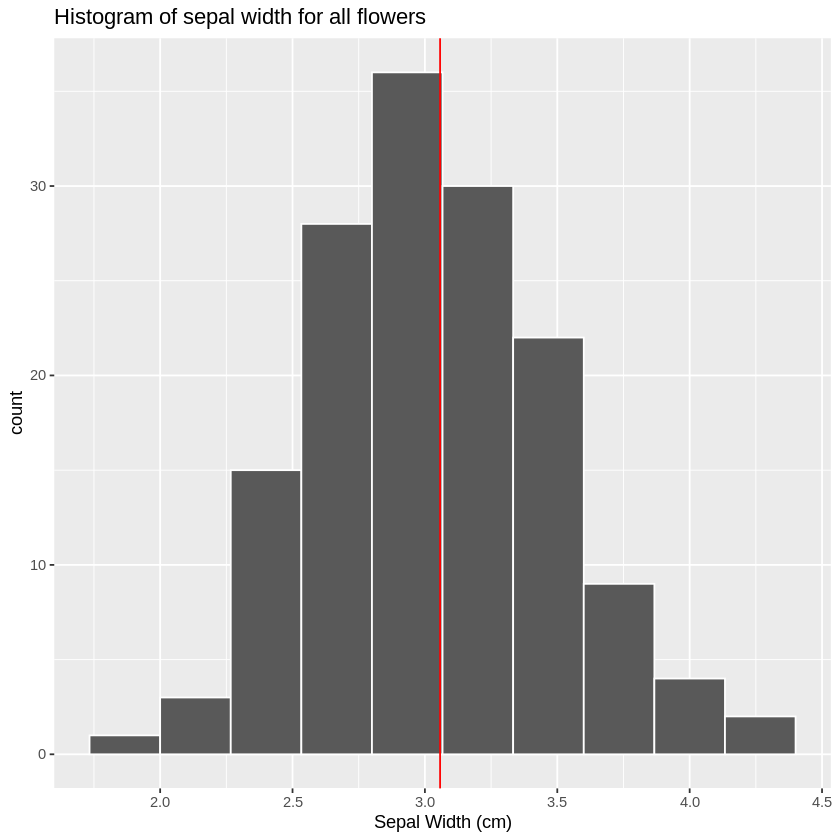

In [ ]:
# To make a more appealing plot, we use the package ggplot2
library(ggplot2)
g <- ggplot(iris, aes(x=Sepal.Width)) + geom_histogram(bins=10, color='white') 
g <- g + xlab('Sepal Width (cm)') 
g <- g + geom_vline(xintercept=mean_sepal_width, color='red')  # remember, we calculated mean_sepal_width before
g <- g + ggtitle('Histogram of sepal width for all flowers')
g

The two histograms are a tiny bit different.
Do you see how the difference? What is it?



....

In [ ]:
# Number of flowers with sepal width less than or equal to 2
sum(iris[,'Sepal.Width'] <= 2)

[1] 1

###**Distribution of the sepal length for all species**

In [ ]:
# Your turn!!  With hist() or ggplot()
# Plot the distribution of the length of the sepals for all species of iris.

hist(iris[,....], ....)
abline(....) 

#or

g <- ggplot(iris, aes(x=....)) + geom_histogram() 
g <- g + xlab(....) 
g <- g + geom_vline(....)  
g



ERROR: ignored

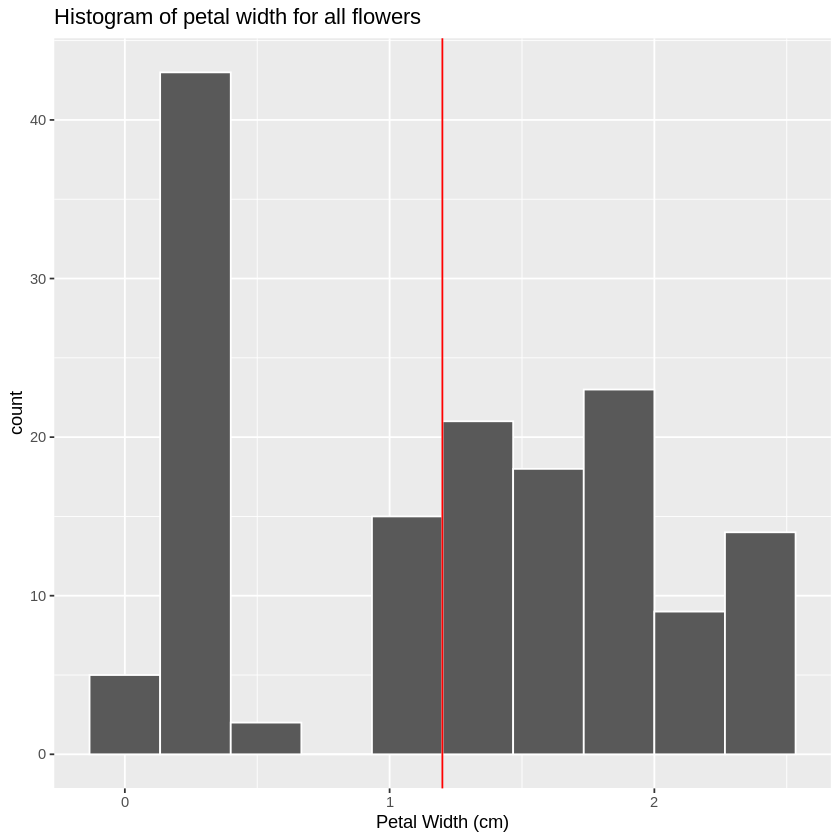

In [ ]:
g <- ggplot(iris, aes(x=Petal.Width)) + geom_histogram(bins=10, color='white') 
g <- g + xlab('Petal Width (cm)') 
g <- g + geom_vline(xintercept=mean_petal_width, color='red')  
g <- g + ggtitle('Histogram of petal width for all flowers')
g

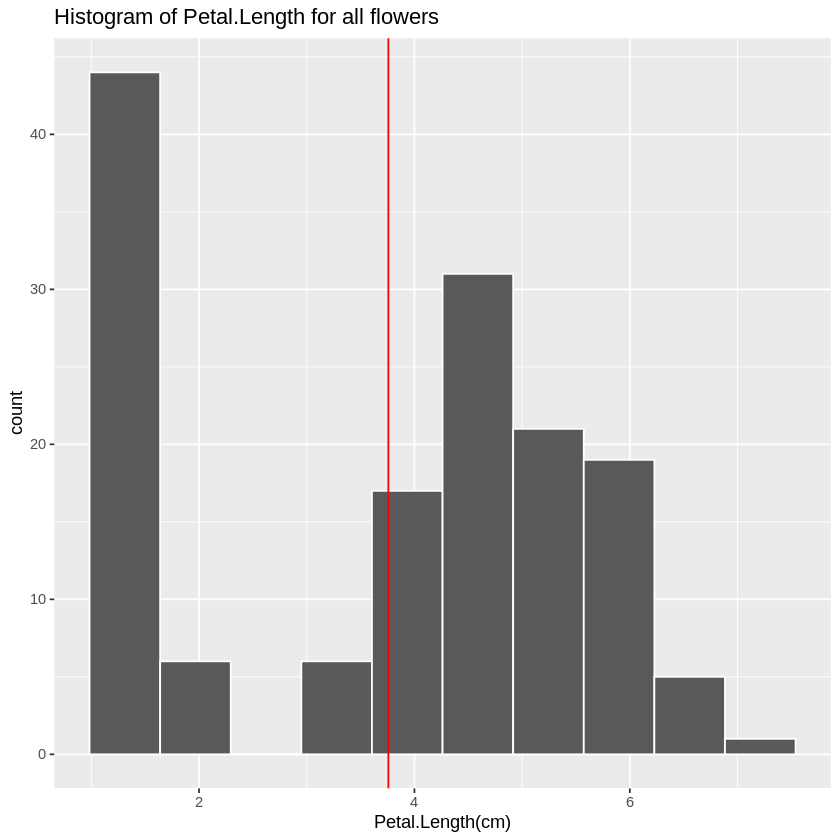

In [ ]:
# Reusable version of this code. We can store the 
# values in variables to be able to modify only those 
# an not all the code.
feature <- 'Petal.Length'
feature_unit <- 'cm'
mean_feature <- mean(iris[,feature])
ptitle <- sprintf('Histogram of %s for all flowers', feature)

g <- ggplot(iris, aes_string(x=feature)) + geom_histogram(bins=10, color='white') 
g <- g + xlab(paste0(feature, '(', feature_unit, ')')) 
g <- g + geom_vline(xintercept=mean_feature, color='red')  
g <- g + ggtitle(ptitle)
g

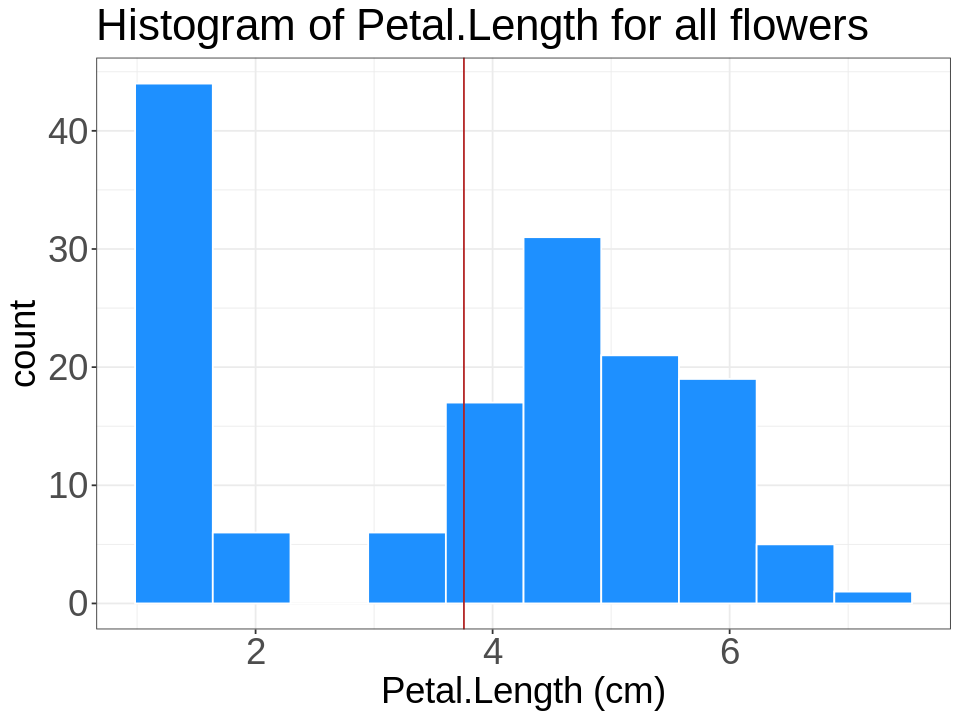

In [ ]:
# Let's customize the appearance of the graph

options(repr.plot.width = 8, repr.plot.height = 6)
feature <- 'Petal.Length'
mean_feature <- mean(iris[,feature])
ptitle <- sprintf('Histogram of %s for all flowers', feature)

g <- ggplot(iris, aes_string(x=feature)) + geom_histogram(bins=10, color='white', fill='dodgerblue') 
g <- g + xlab(paste0(feature, ' (cm)')) 
g <- g + geom_vline(xintercept=mean_feature, color='firebrick')  
g <- g + ggtitle(ptitle)
g <- g + theme_bw() 
g <- g + theme(axis.text=element_text(size=22), axis.title=element_text(size=22), title=element_text(size=22))
g

###**Let's visualized all these graphs together!**



Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


Using Species as id variables



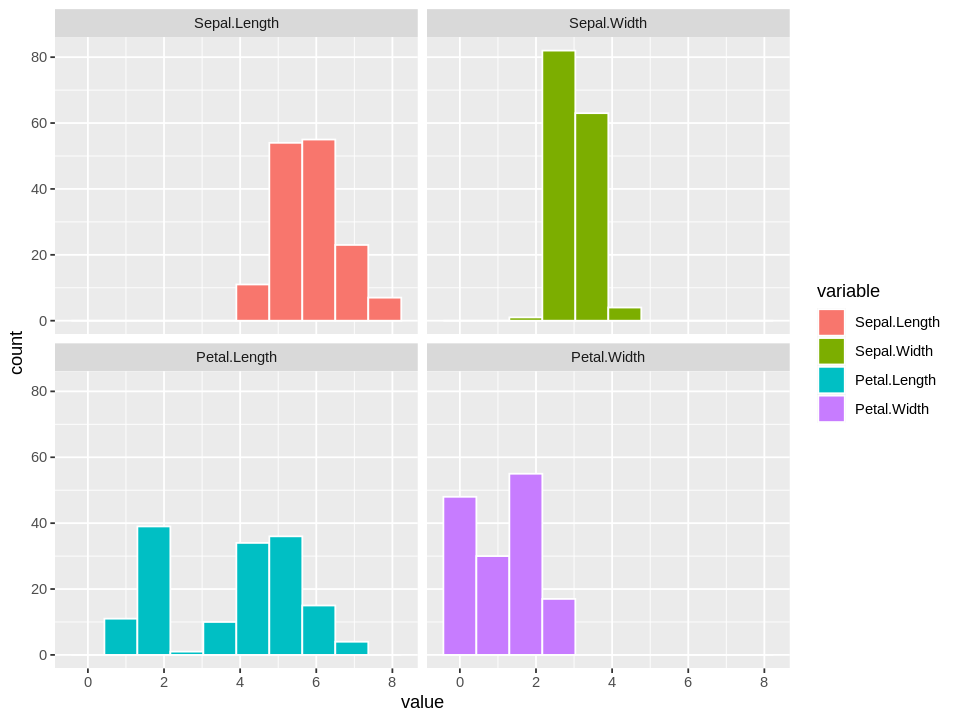

In [ ]:
# Here, ggplot2 is very convenient but the data need to be formatted into a 'long' format.
# The format we had before is called 'wide' (sometimes, 'table' format).
library(reshape)
iris_melt <- reshape::melt(iris)

# facets are multi-planel plots. We can view the data per feature, class...
g <- ggplot(iris_melt, aes(x=value, fill=variable)) + geom_histogram(bins=10, color='white') 
g <- g + facet_wrap(.~variable)
g


Attaching package: ‘cowplot’


The following object is masked from ‘package:reshape’:

    stamp




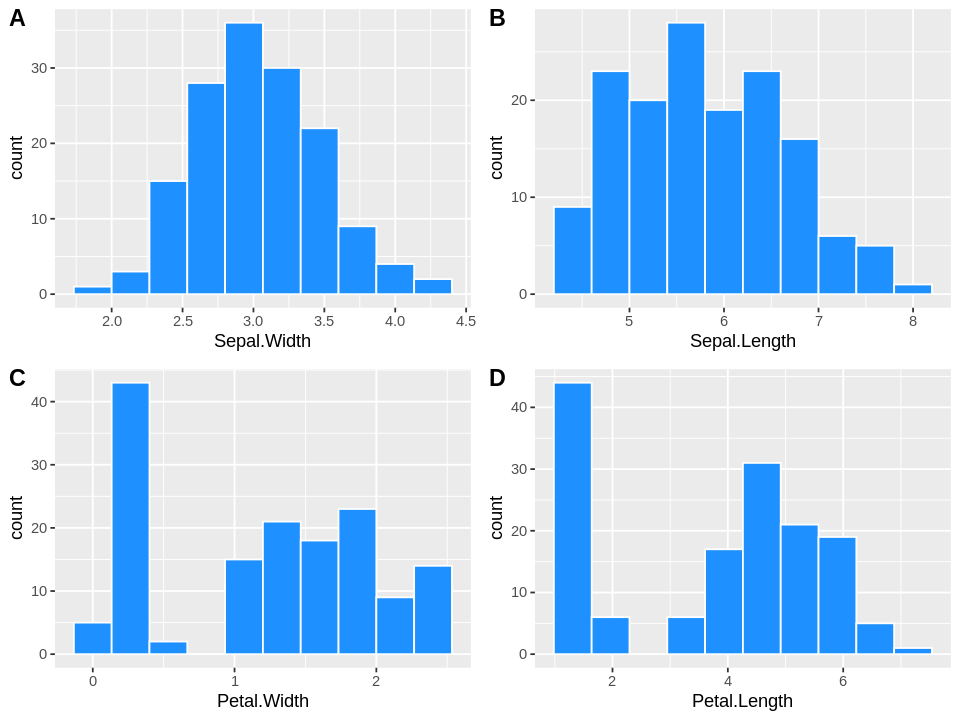

In [ ]:
# cowplot contains fonction to create publication ready figures
library(cowplot)

g1 <- ggplot(iris, aes_string(x='Sepal.Width')) + geom_histogram(bins=10, color='white', fill='dodgerblue') 
g2 <- ggplot(iris, aes_string(x='Sepal.Length')) + geom_histogram(bins=10, color='white', fill='dodgerblue') 
g3 <- ggplot(iris, aes_string(x='Petal.Width')) + geom_histogram(bins=10, color='white', fill='dodgerblue') 
g4 <- ggplot(iris, aes_string(x='Petal.Length')) + geom_histogram(bins=10, color='white', fill='dodgerblue') 

plot_grid(g1, g2, g3, g4, labels = "AUTO")


## **Visualization of the features distribution per specie**


In order to study the Iris species, we would like to know:


*   What is the distribution of the sepals and petals widths?
*   What is the distribution of the sepals and petals lengths?
*   What is the median size of each of this features, for each one of the three species? 
*   Are there significant differences between theses disitributions?

### **Distribution of sepal-width and sepal-length for each specie**

In [ ]:
library(reshape)
iris_melt <- reshape::melt(iris)

# Look at the first 3 lines. Do you see the difference with the wide format?
iris_melt[1:3,]

Using Species as id variables



,Species,variable,value
,<fct>,<fct>,<dbl>
1,setosa,Sepal.Length,5.1
2,setosa,Sepal.Length,4.9
3,setosa,Sepal.Length,4.7


In [ ]:
# Keeping only the feature we are interested in, here 'Sepal.Width
iris_sepal_feature <- iris_melt[iris_melt[,'variable']=='Sepal.Width',]

In [ ]:
# Your turn! Try to only run iris_melt[,'variable']=='Sepal.Width' in your console to see what it returns


....

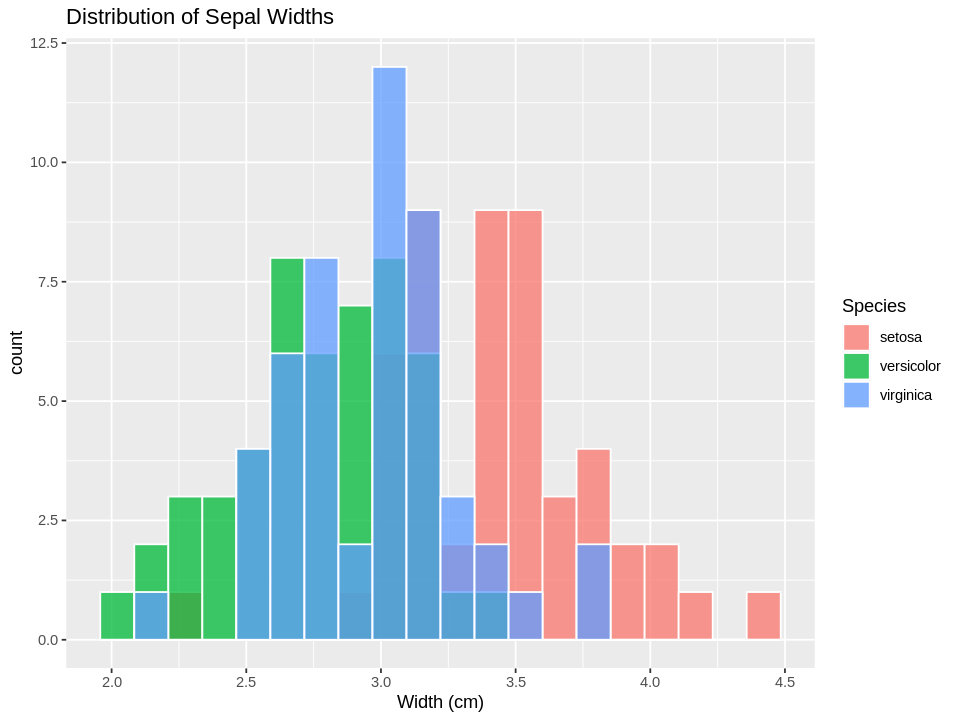

In [ ]:
# The following line sets the width and height of the plot.
options(repr.plot.width = 8, repr.plot.height = 6)

g <- ggplot(iris_sepal_feature, aes(x=value, fill=Species)) 
g <- g + geom_histogram(bins=20, color='white', position='identity', alpha=0.75) 
g <- g + xlab('Width (cm)')
g <- g + ggtitle('Distribution of Sepal Widths')
g

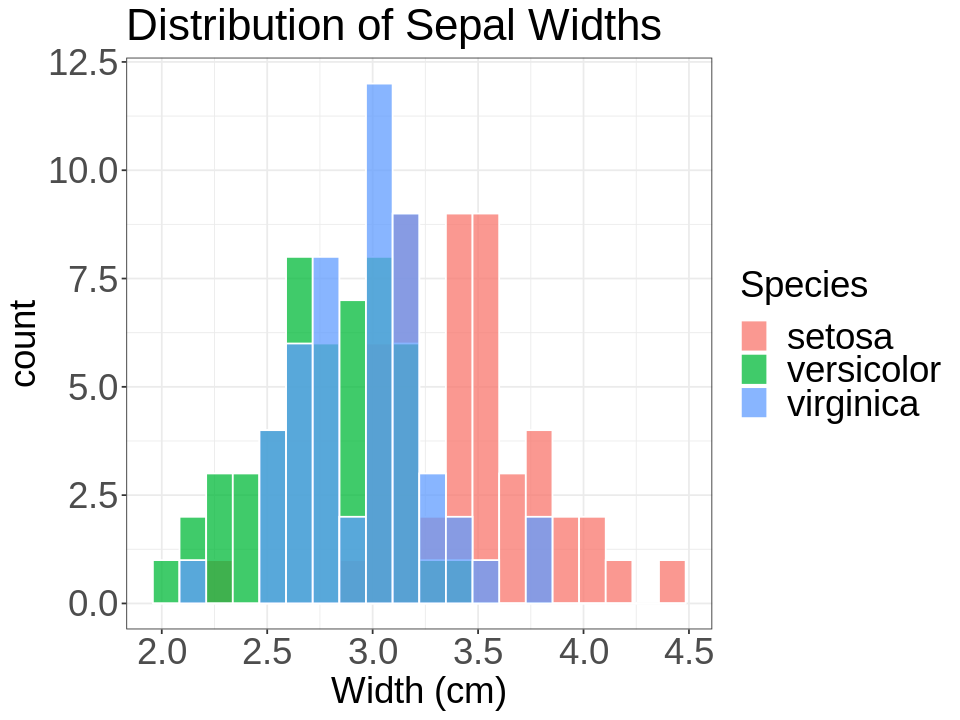

In [ ]:
# We can customize the look of the graph
g <- g + theme_bw() 
g <- g + theme(axis.text=element_text(size=22),
               axis.title=element_text(size=22), 
               title=element_text(size=22), 
               legend.text=element_text(size=22))
g

In [ ]:
# Your turn!!
# Change the fontsize using a variable
font_size = .....
g <- g + theme_bw() 
g <- g + theme(axis.text=element_text(size=...), 
               axis.title=element_text(size=...), 
               title=element_text(size=...), 
               legend.text=element_text(size=...))
g

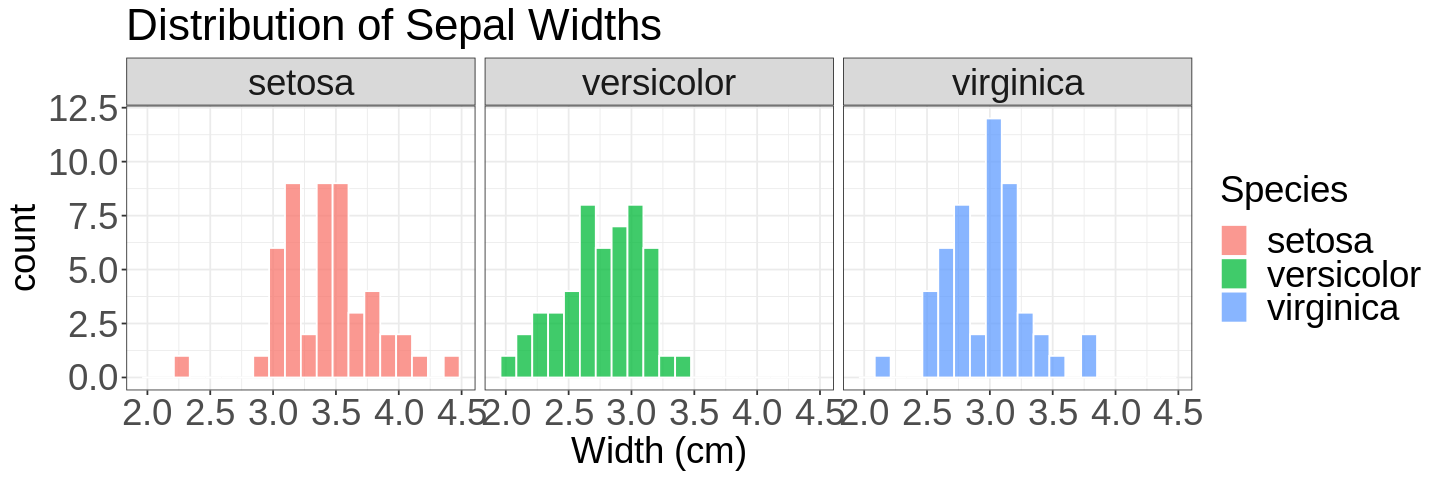

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 4)

g <- g + facet_wrap(.~Species, nrow=1)
g <- g + theme(strip.text.x = element_text(size = 22))
g

### **Distribution of petal-width and petal-length for each specie**

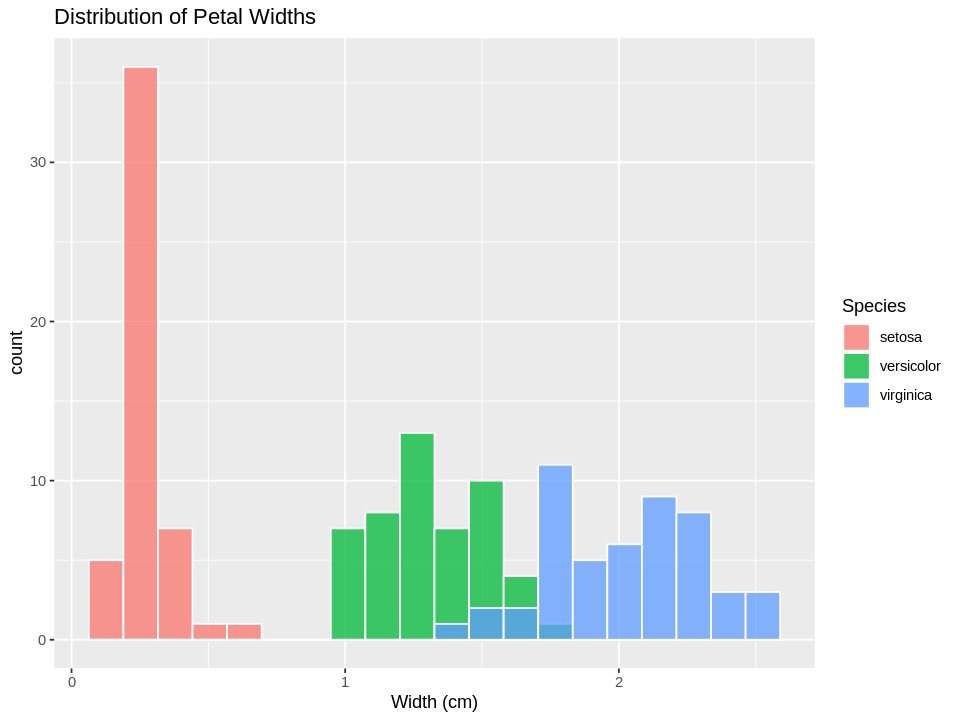

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)

iris_petal_feature <- iris_melt[iris_melt[,'variable']=='Petal.Width',]
g <- ggplot(iris_petal_feature, aes(x=value, fill=Species)) + geom_histogram(bins=20, color='white', position='identity', alpha=0.75) 
g <- g + xlab('Width (cm)')
g <- g + ggtitle('Distribution of Petal Widths')
g

In [ ]:
# Your turn!!
# Modify the following code to plot the distribution of the petal lengths
iris_petal_feature <- iris_melt[iris_melt[,'variable']==....,]
g <- ggplot(iris_petal_feature, aes(x=value, fill=Species)) + geom_histogram(bins=20, color='white', position='identity', alpha=0.75) 
g <- g + xlab(....)
g <- g + ggtitle('Distribution of .....')
g

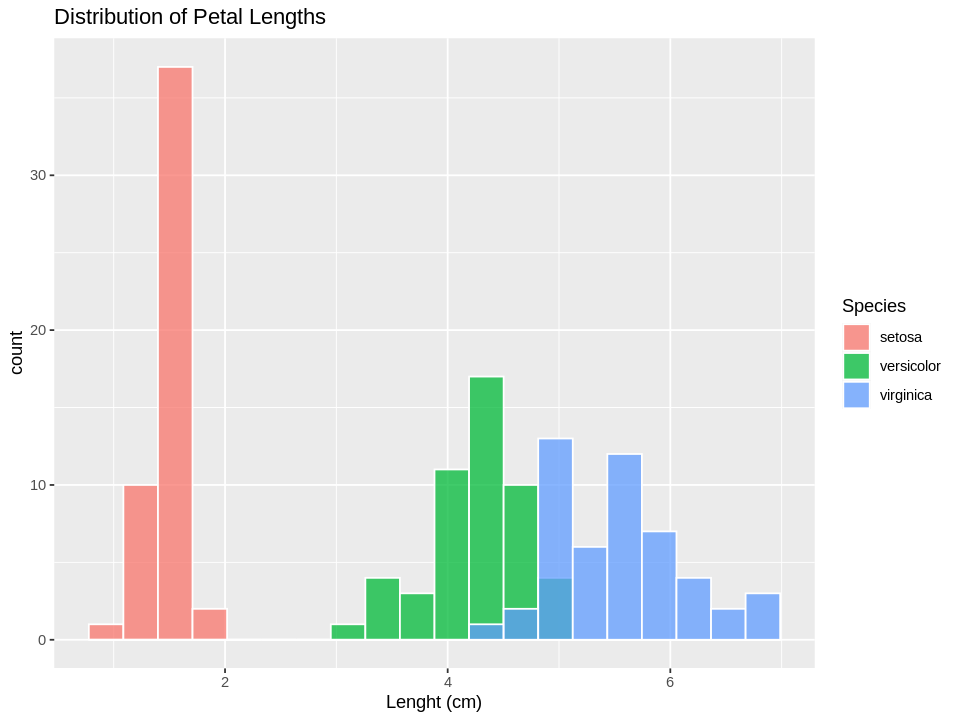

In [ ]:
# Keeping only the Petal Lenght data
iris_petal_feature <- iris_melt[iris_melt[,'variable']=='Petal.Length',]

# Creating the plot
g <- ggplot(iris_petal_feature, aes(x=value, fill=Species)) + geom_histogram(bins=20, color='white', position='identity', alpha=0.75) 
g <- g + xlab('Lenght (cm)')
g <- g + ggtitle('Distribution of Petal Lengths')
g

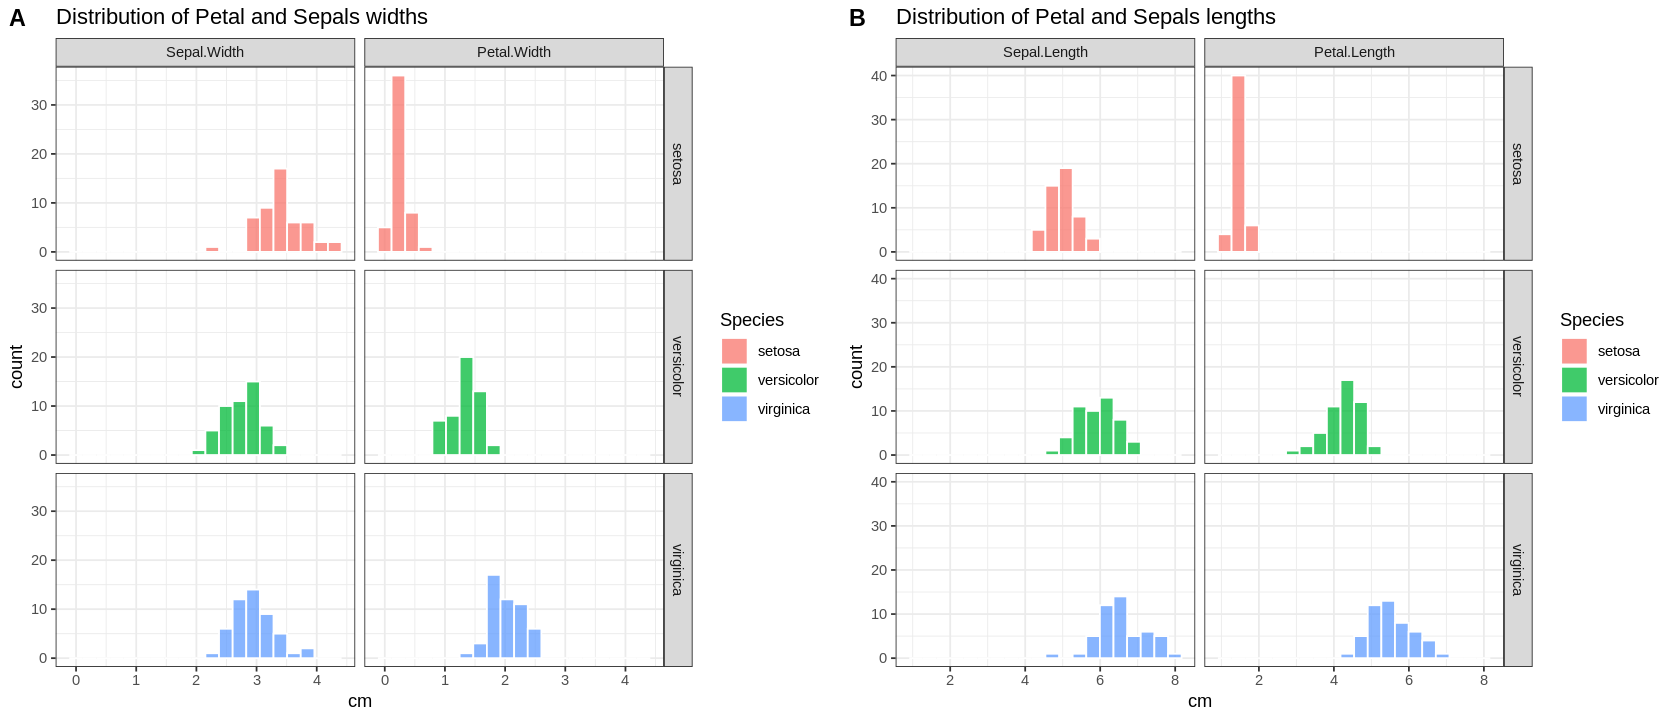

In [ ]:
# See all features at the same time
# Set the dimensions of the plot
options(repr.plot.width=14, repr.plot.height=6)

# Keep the data we need
widths <- iris_melt[grep('Width', iris_melt[,'variable']),]

# Make a first plot
g1 <- ggplot(widths, aes(x=value, fill=Species)) + geom_histogram(bins=20, color='white', position='identity', alpha=0.75) 
g1 <- g1 + xlab('cm')
g1 <- g1 + ggtitle('Distribution of Petal and Sepals widths')
g1 <- g1 + facet_grid(Species~variable) + theme_bw()

# Keep the data we need
lengths <- iris_melt[grep('Length', iris_melt[,'variable']),]

# Make the second plot
g2 <- ggplot(lengths, aes(x=value, fill=Species)) + geom_histogram(bins=20, color='white', position='identity', alpha=0.75) 
g2 <- g2 + xlab('cm')
g2 <- g2 + ggtitle('Distribution of Petal and Sepals lengths')
g2 <- g2 + facet_grid(Species~variable) + theme_bw()

# Assembling
plot_grid(g1, g2, labels = "AUTO")

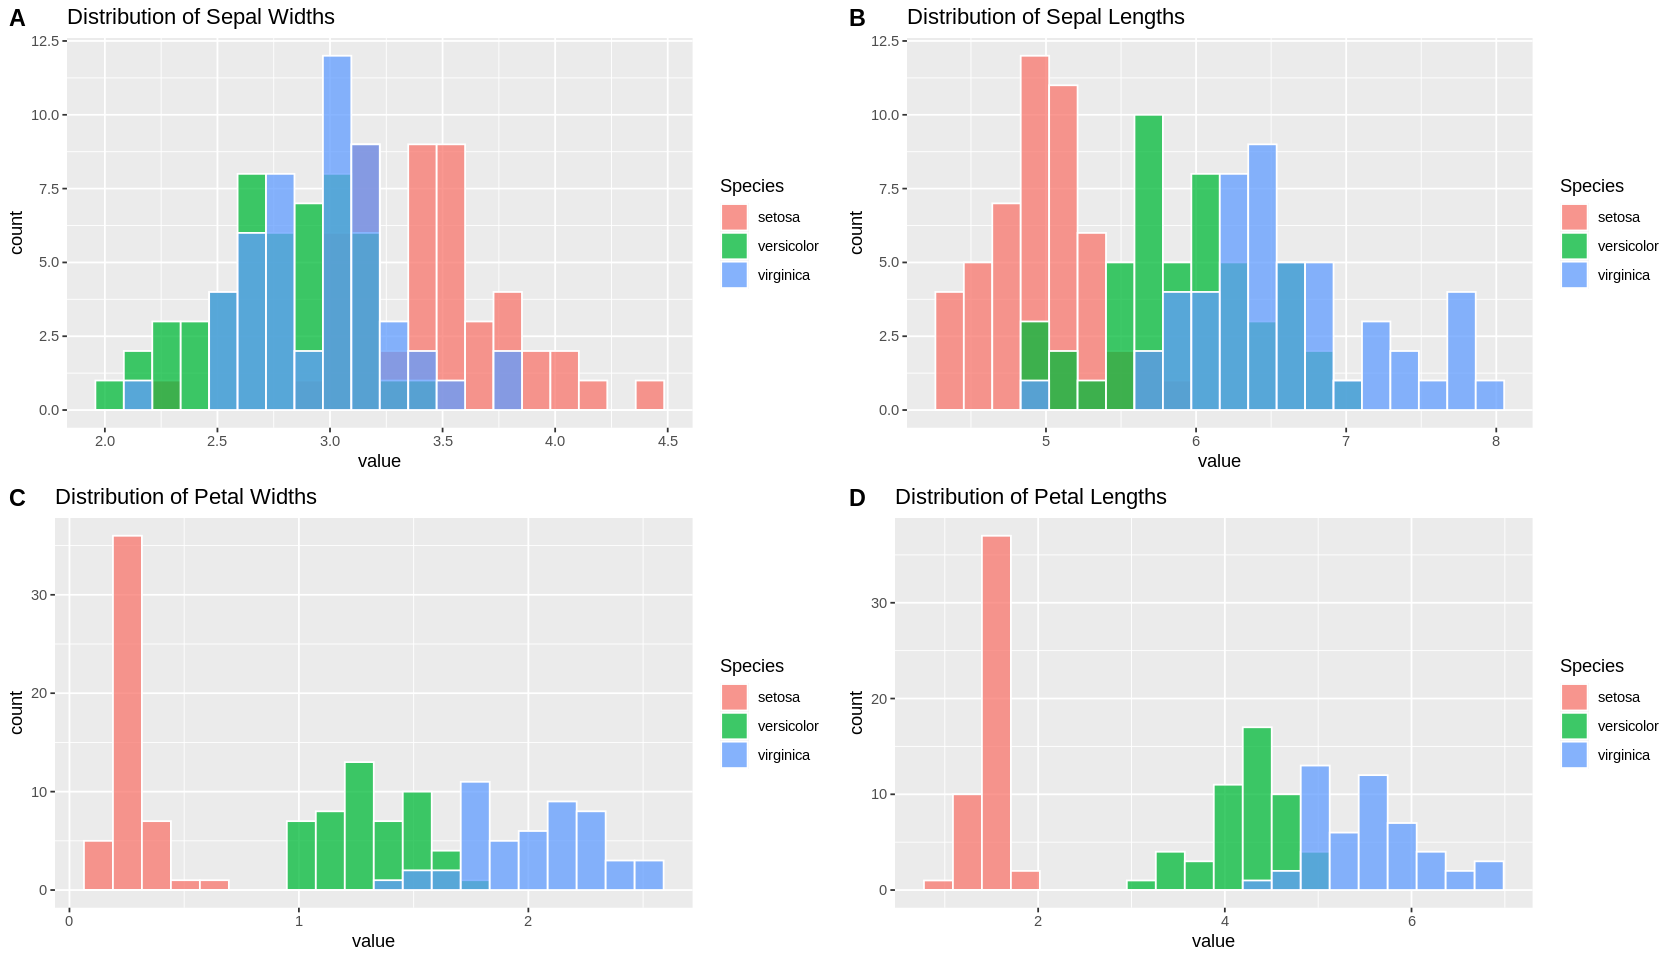

In [ ]:
options(repr.plot.width=14, repr.plot.height=8)

# Defining a function to plot the histogram without using ggplot's facet
plot_distribution <- function(df_melt, variable, cat, title='') {
  df_feature <- df_melt[df_melt[,'variable']==variable,]
  g <- ggplot(df_feature, aes_string(x='value', fill=cat)) + geom_histogram(bins=20, color='white', position='identity', alpha=0.75) 
  g <- g + ggtitle(title)
  return(g)
}

g1 <- plot_distribution(iris_melt, 'Sepal.Width', 'Species', 'Distribution of Sepal Widths')
g2 <- plot_distribution(iris_melt, 'Sepal.Length', 'Species', 'Distribution of Sepal Lengths')
g3 <- plot_distribution(iris_melt, 'Petal.Width',  'Species', 'Distribution of Petal Widths')
g4 <- plot_distribution(iris_melt, 'Petal.Length', 'Species', 'Distribution of Petal Lengths')

plot_grid(g1, g2, g3, g4, labels = "AUTO")

In [ ]:
# Helper code to adjust font size on ggplot graph
# We store the elements in a variable
font_size <- 22
font_change <- theme(axis.text=element_text(size=font_size),
               axis.title=element_text(size=font_size), 
               title=element_text(size=font_size), 
               legend.text=element_text(size=font_size),
               strip.text.x = element_text(size = font_size))

## **Observations**

From this analysis, what can you conclude?

We can conlude that: 
* the sepal width for the three species is very similar, we can't really 
distinguish any species by its sepal width. 

* the sepal length seems to be a bit more variable between the flowers species but you can not say for sure that it is different

* the petal widths of Iris setosa are smaller and the distribution do not overlap the distributions of the other two species.

* the petal lengths of Iris setosa are smaller and the distribution do not overlap the distributions of the other two species.



# **Significance Difference**

Let's look at the distribution using a boxplot.

A boxplot is a standardized way of displaying the dataset based on a five-number summary: a lower bound value, a higher bound value, the median, and the first and third quartiles.  Outliers are often marked with a circle, but it depends if the function uses the maximum and minimum as the higher bound and lower bound.

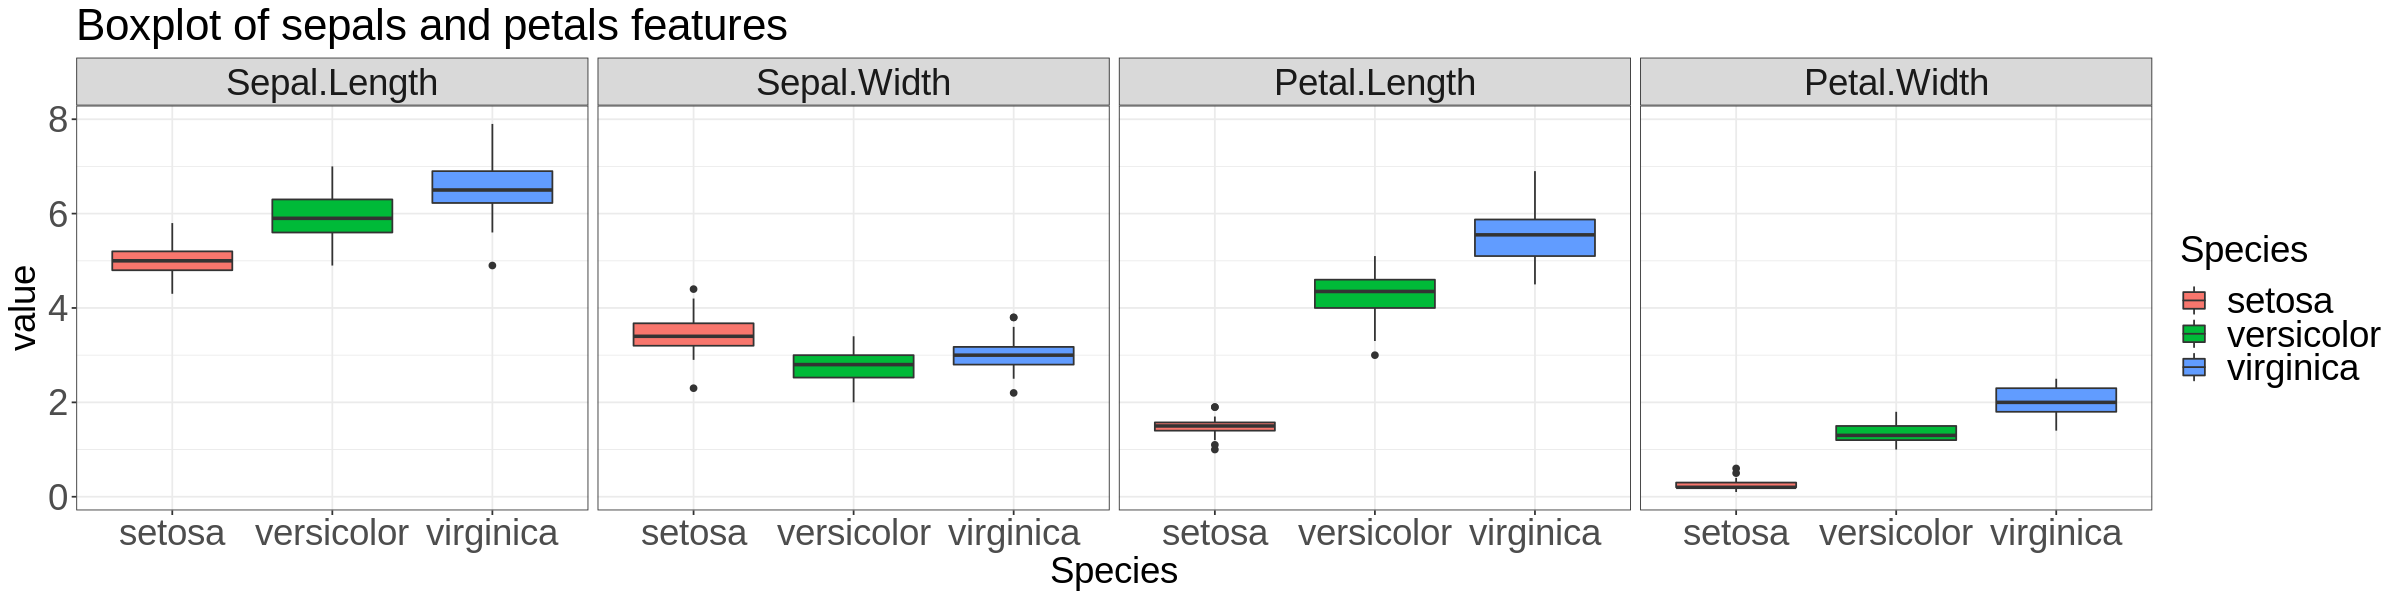

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 5)

# ggplot2 has a geom_boxplot function.  boxplot() is another option to plot a boxplot
g <- ggplot(iris_melt, aes(x=Species, y=value, fill=Species)) + geom_boxplot()
g <- g + ggtitle('Boxplot of sepals and petals features')
g <- g + facet_grid(.~variable) 
g <- g + theme_bw() 
g <- g + font_change   # we define this earlier to have bigger text on the graph
g

We see a difference in the petal lengths and widths of Iris Setosa.  This specie seems to be more distinguishable from the two others.  Is this difference only seen by random or is it statistically significant?

A statistical test can allow us to be more certain that the difference is not due to random.


The lower the p-value, the stronger the evidence against the null hypothesis which says that the two populations compared are equal.  The less chance the observation is seen by chance.

For more detail about the test Mann-Whitney-U, you can consult the link below:
    
https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/BS704_Nonparametric4.html



### **Is the difference we see for the distribution of setosa's petals lengths a significant one?**

In [ ]:
# Using the non parametric Mann-Whitney U Test, our null hypothesis is that the
# two flowers are from the same distribution.

# Define the feature of interest
feature <- 'Petal.Length'

# Get the data for this feature for each specie
iris_setosa <- iris[iris[,'Species']=='setosa', feature]
iris_versicolor <- iris[iris[,'Species']=='versicolor', feature]
iris_virginica <- iris[iris[,'Species']=='virginica', feature]

# Run the Mann-Withney test (also known as Wilcoxson test) 
# comparing species two by two (pairwise)
setosa_versicolor_u <- wilcox.test(iris_setosa, iris_versicolor) 
virginica_versicolor_u <- wilcox.test(iris_virginica,iris_versicolor) 
setosa_virginica_u <- wilcox.test(iris_setosa,iris_virginica) 

# Print the resulting p-value
print(paste0('Setosa vs Versicolor ', feature, ': pvalue = ', setosa_versicolor_u$p.value))
print(paste0('Virginica vs Versicolor ', feature, ': pvalue = ', virginica_versicolor_u$p.value))
print(paste0('Setosa vs Virginica ', feature, ': pvalue = ', setosa_virginica_u$p.value))


[1] "Setosa vs Versicolor Petal.Length: pvalue = 5.65101158429015e-18"
[1] "Virginica vs Versicolor Petal.Length: pvalue = 9.13354472766832e-17"
[1] "Setosa vs Virginica Petal.Length: pvalue = 5.66521448573828e-18"


#### **Observations**

What can you conclude from this analysis?

As we thought, the petal lengths distribution of Iris setosa is statistically significantly different from the petal lengths distribution of the other flowers.  This means that Iris setosa presents a marked difference according to its morphological features compared to versicolor and virginica.

## **What can you say about the other features describing the species?**

In [ ]:
# Creating a function to apply the wilcoxon test
compute_wilcox <- function(feature){
  iris_setosa <- iris[iris[,'Species']=='setosa', feature]
  iris_versicolor <- iris[iris[,'Species']=='versicolor', feature]
  iris_virginica <- iris[iris[,'Species']=='virginica', feature]

  setosa_versicolor_u <- wilcox.test(iris_setosa, iris_versicolor)
  virginica_versicolor_u <- wilcox.test(iris_virginica,iris_versicolor) 
  setosa_virginica_u <- wilcox.test(iris_setosa,iris_virginica) 

  print(sprintf('%s : Setosa vs Versicolor : pvalue = %s', feature, setosa_versicolor_u$p.value))
  print(sprintf('%s : Virginica vs Versicolor : pvalue = %s ', feature, virginica_versicolor_u$p.value))
  print(sprintf('%s : Setosa vs Virginica : pvalue = %s', feature, setosa_virginica_u$p.value))
}

# A for loop is useful to iterate automatically through a list of values and 
# run some code using the value which changes dynamically at each iteration.
# Here, feature will take the value 'Petal.Length' and will be passed to our function compute_wilcox
# Then it will take the value 'Petal.Width' and will be passed to our function compute_wilcox
# And so on.
for (feature in c('Petal.Length', 'Petal.Width', 'Sepal.Length', 'Sepal.Width')){
  compute_wilcox(feature)
  print('------')
}

[1] "Petal.Length : Setosa vs Versicolor : pvalue = 5.65101158429015e-18"
[1] "Petal.Length : Virginica vs Versicolor : pvalue = 9.13354472766832e-17 "
[1] "Petal.Length : Setosa vs Virginica : pvalue = 5.66521448573828e-18"
[1] "------"
[1] "Petal.Width : Setosa vs Versicolor : pvalue = 2.28466945440238e-18"
[1] "Petal.Width : Virginica vs Versicolor : pvalue = 9.6980454449142e-17 "
[1] "Petal.Width : Setosa vs Virginica : pvalue = 2.432193137065e-18"
[1] "------"
[1] "Sepal.Length : Setosa vs Versicolor : pvalue = 8.34582714594074e-14"
[1] "Sepal.Length : Virginica vs Versicolor : pvalue = 5.8690064106642e-07 "
[1] "Sepal.Length : Setosa vs Virginica : pvalue = 6.39669906939659e-17"
[1] "------"
[1] "Sepal.Width : Setosa vs Versicolor : pvalue = 2.14337972807753e-13"
[1] "Sepal.Width : Virginica vs Versicolor : pvalue = 0.00457214220687986 "
[1] "Sepal.Width : Setosa vs Virginica : pvalue = 7.0997089017643e-09"
[1] "------"


In [ ]:
# Be sure you understand what a for loop is.  It's very useful.  
# Here's a simpler example of a 'for' loop
for (i in c(1,2,3,4,5)) {
  print(sprintf('i stores the value: %i',i))
}
# For loops can help you generate automatically (in batch) analysis results, files, images, etc.
# Let the computer do the repetitive work while you do something else in the meantime (work, coffee, sleep, etc. you choose!)

[1] "i stores the value: 1"
[1] "i stores the value: 2"
[1] "i stores the value: 3"
[1] "i stores the value: 4"
[1] "i stores the value: 5"


### **Observations**

What can you conclude about the Mann-Withney test you've conducted for all the features of the flowers?

....

# **ScatterPlot and Pairplot to view the relation between the features**




## **Scatter Plot**

A scatter plot is a 2-dimensional data visualization that present the values of two different variables : one plotted along the x-axis and the other plotted along the y-axis.

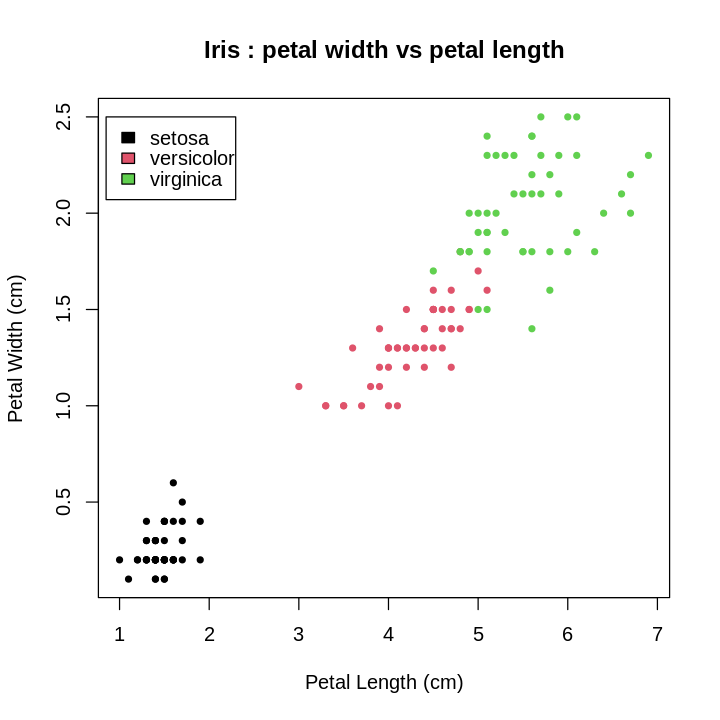

In [ ]:
# Using R core function plot()
options(repr.plot.width = 6, repr.plot.height = 6)

plot(x=iris[,'Petal.Length'], y=iris[,'Petal.Width'], col=iris[,'Species'], pch=20,
   xlab='Petal Length (cm)', ylab='Petal Width (cm)', main='Iris : petal width vs petal length')
legend(0.85,2.5, as.vector(unique(iris$Species)),fill=c(1,2,3))


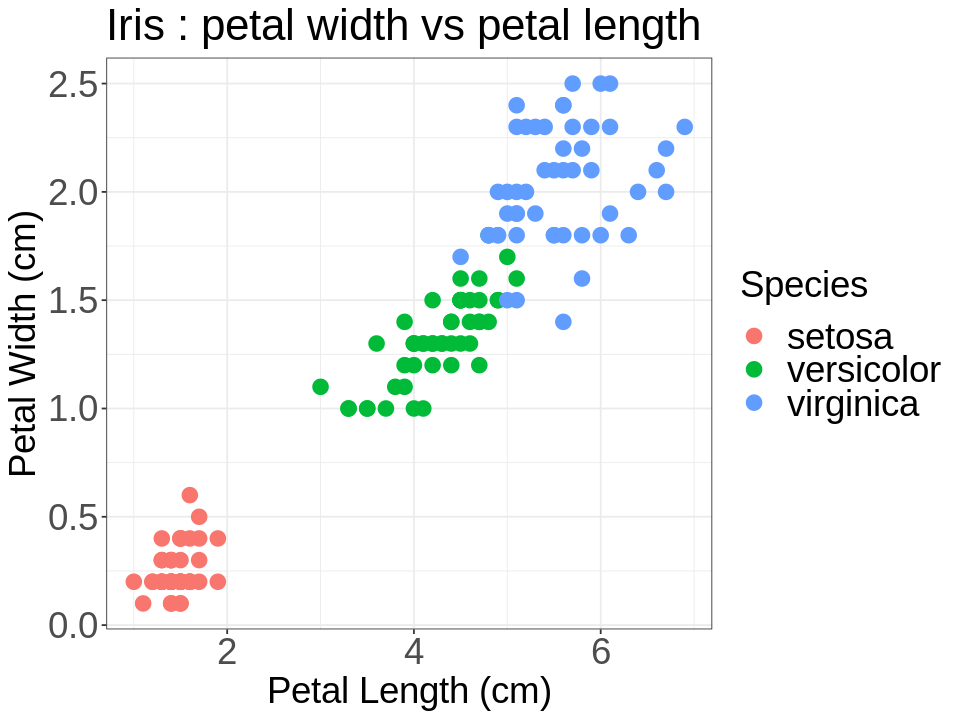

In [ ]:
# Using ggplot2
options(repr.plot.width = 8, repr.plot.height = 6)

g <- ggplot(iris, aes(x=Petal.Length, y=Petal.Width, color=Species)) + geom_point(size=4)
g <- g + ggtitle('Iris : petal width vs petal length')
g <- g + xlab('Petal Length (cm)')
g <- g + ylab('Petal Width (cm)')
g <- g + theme_bw() + font_change
g

#### **Observations**

Looking at the scatterplot, we can intuitively create rules using petals lengths and widths that would be able to separate the flowers species.

For example: (looking at the graph)
```
if 0 ≤ petal_length ≤ 2 and 0 ≤ petal_width ≤ 0.7 then setosa
if 2 ≤ petal_length ≤ 5.2 and 1 ≤ petal_length ≤1.7 then versicolor
else virginica
```

## **Pairplot**

Pairplot displays pairwise scatterplots of numerical features.

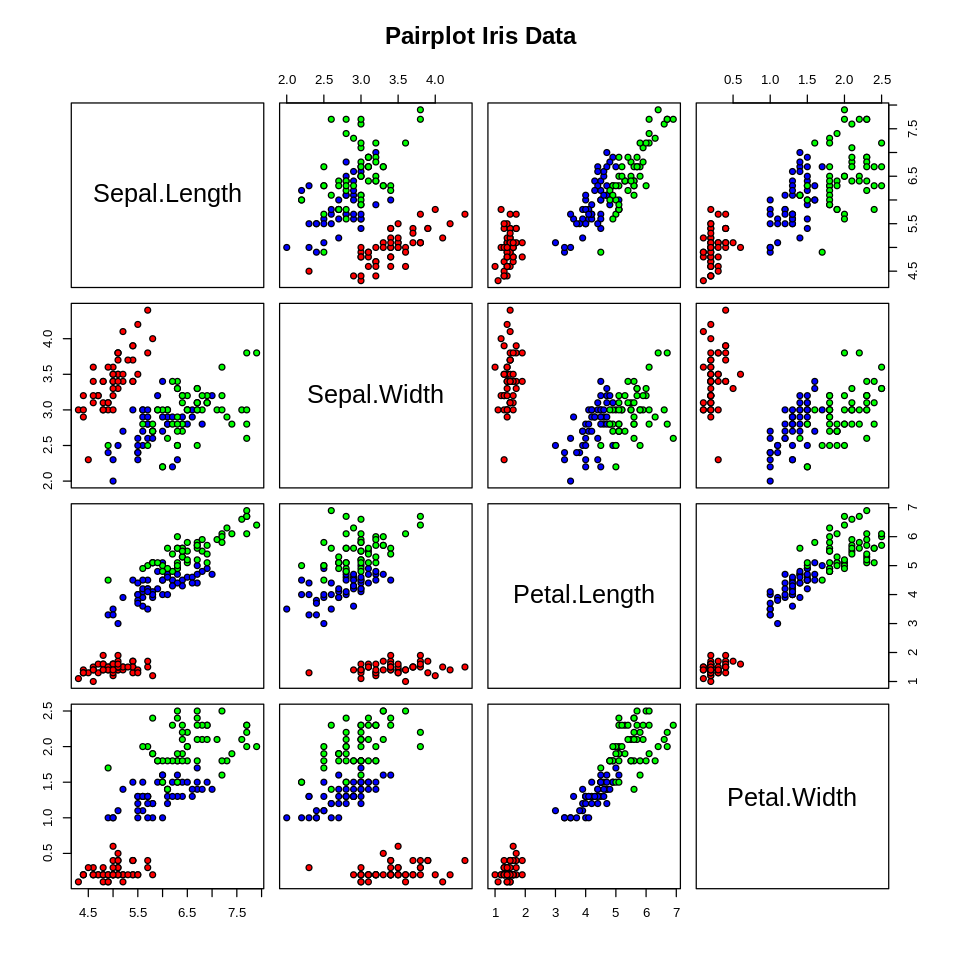

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)

# Define the color we want 
colors <- as.character(iris[,'Species'])
colors[colors=='setosa'] <- 'red'
colors[colors=='virginica'] <- 'blue'
colors[colors=='versicolor'] <- 'green'

# Or 
colors <- c('red','blue','green')[iris[,'Species']]

# Plot the pairs
pairs(iris[,1:4], main = "Pairplot Iris Data", pch = 21, bg=colors)

### **Observations**

We can actually see from the pairplot (or if we had produced all the pairwise scatterplots) that rules could also be derived to identify setosa using sepal length and width. 
It would however be more challenging to apply than the one we derived earlier using the petals lengths and widths.  And sepals lengths and widths do not allow a clear separation of virginca and versicolor.

# **Principal Component Analysis (PCA)**

The groups Iris virginica and Iris versicolor are a little mixed: they are not linearly separable. 

If we want to be able to separate them (to eventually be able to classify them automatically), we might need to transform the data in order to outline a better linear separation.

PCA is also commonly used in machine learning to reduce the number of dimensions/features of a dataset prior to using a predictive model.  This dimensionality reduction do not involve any feature selection. 

In a PCA, the data is projected into another set of dimensions (principal components) which are constructed to maximize the variation (hence the separation) in the data. One advantage is that it uses information from all the input features and find the 'space' where there is the most dispersion between the points while using the smallest number of dimensions/features possible.

Remember earlier when we derive rules to classify a flower (using petals widths and lengths).  With PCA, you do not choose the features and derive rules.  You can use all the features and let the PCA do its job.  Note that it is an unsupervised learning method, it is unaware of the specie of the flowers.




In [ ]:
# Just a reminder of your dataset
head(iris,3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [ ]:
# The function 'grep()' check if the terms Length or Width are present in the column names
# If one of the term is present, the index of the column is return.  
# The function 'colnames()' returns the names of the columns
col_index <-  grep('Length|Width', colnames(iris), perl=TRUE)
iris_features <- iris[,col_index]

# prcomp is the function for PCA
pc <- prcomp(iris_features, center=T, scale=T)
pc

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

In [ ]:
# Get a summary of the results
# PC1 always explains most of the variation
summary(pc)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

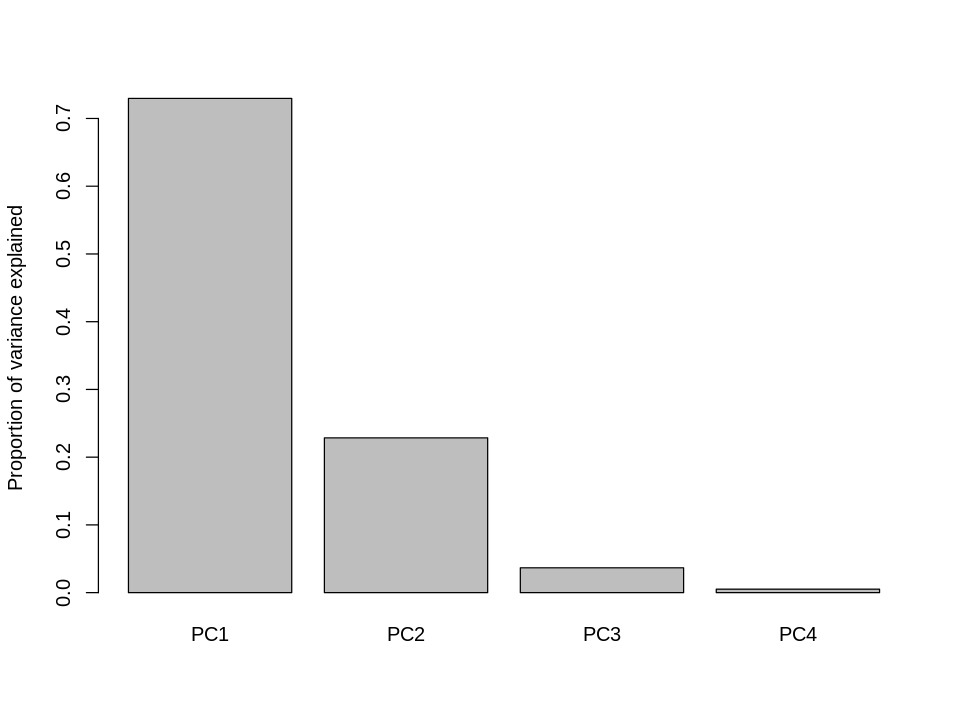

In [ ]:
barplot(summary(pc)$importance[2,], ylab='Proportion of variance explained')

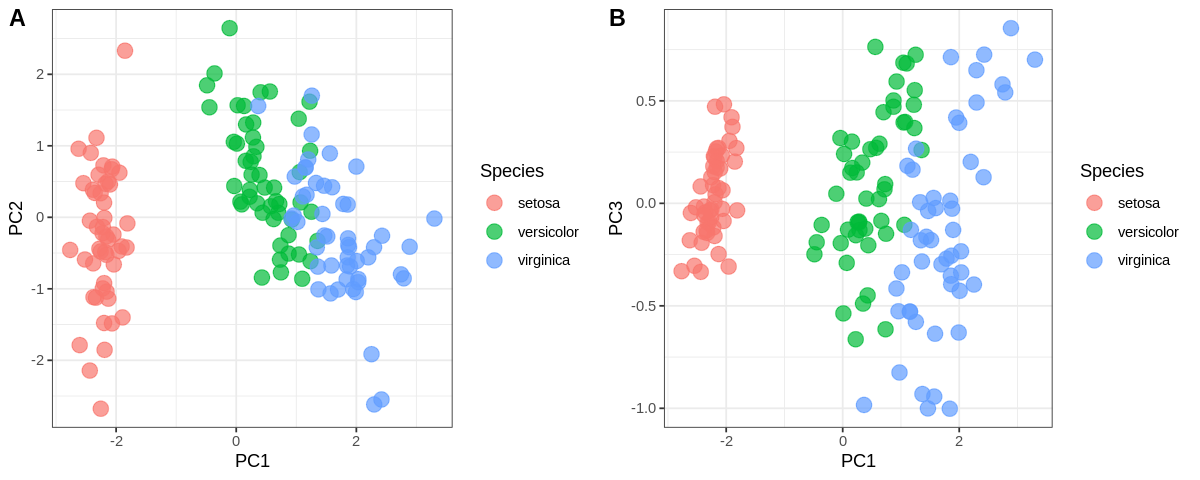

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 4)

# 'cbind()' stands for column bind, we join concatenate columns together
pca <- cbind(as.data.frame(pc$x), Species=iris$Species)

g1 <- ggplot(pca, aes(x=PC1, y=PC2, color=Species)) + geom_point(size=4, alpha=0.7)
g1 <- g1 + theme_bw()

g2 <- ggplot(pca, aes(x=PC1, y=PC3, color=Species)) + geom_point(size=4, alpha=0.7)
g2 <- g2 + theme_bw()

plot_grid(g1, g2, labels = "AUTO")

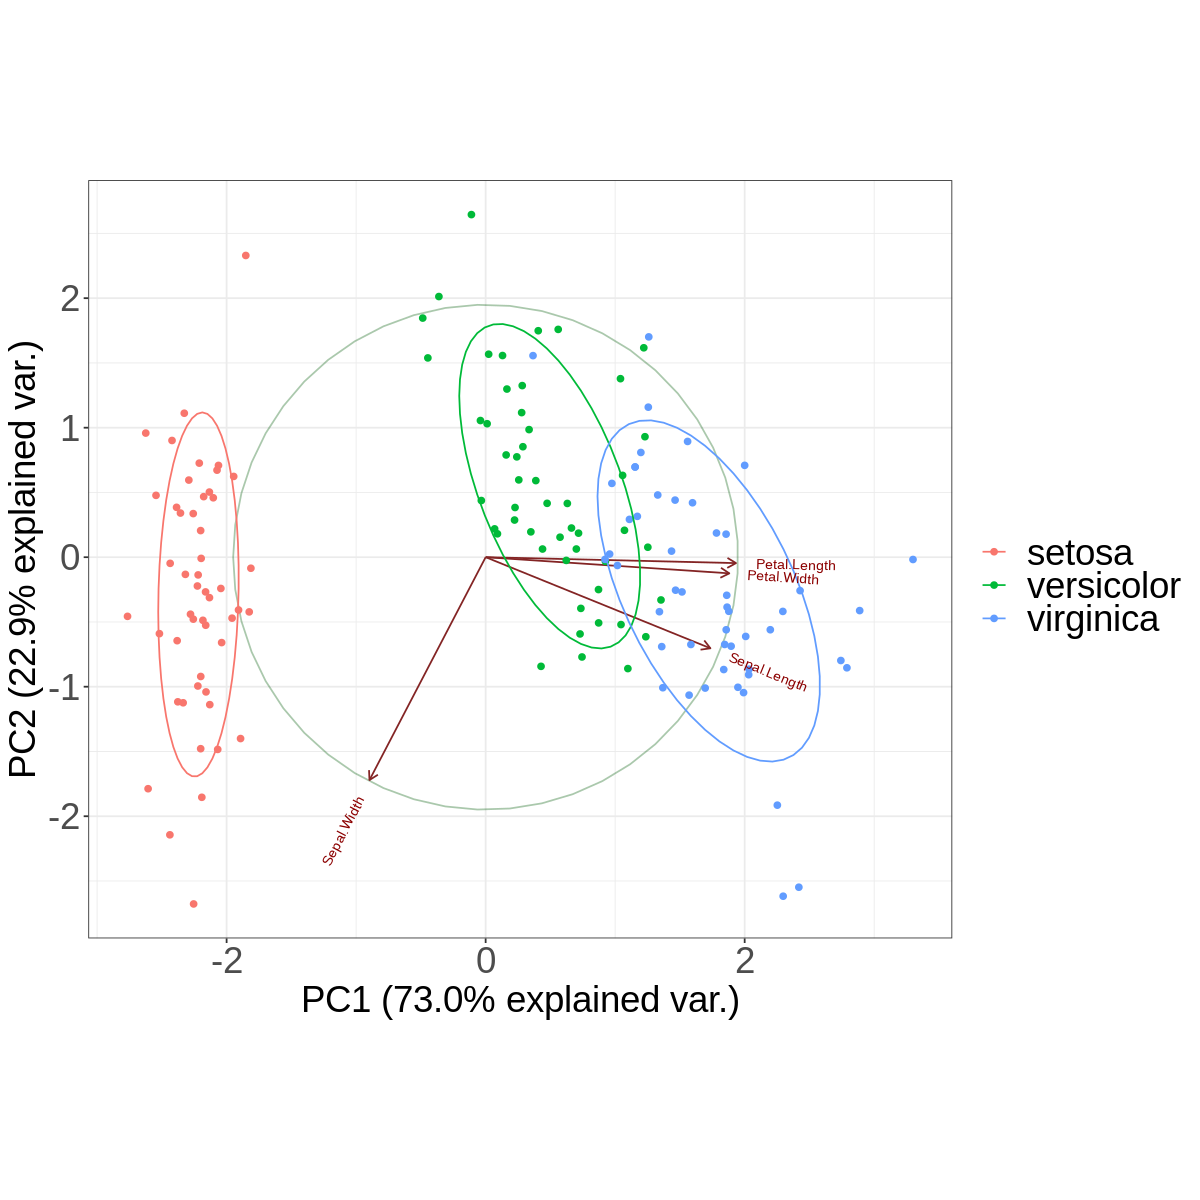

In [ ]:
# ggbiplot offers a nice representation of the PCA results
library(ggbiplot)

options(repr.plot.width = 10, repr.plot.height = 10)

g <- ggbiplot(pc, obs.scale = 1, var.scale = 1,
  groups = iris$Species, ellipse = TRUE, circle = TRUE,ellipse.prob = 0.68) +
  scale_color_discrete(name = '') +
  theme(legend.direction = 'horizontal', legend.position = 'top')
g <- g + theme_bw() + font_change
g

In [ ]:
# We can try to place new flowers (unseen flowers) on the plot
new_flower1 <- matrix(c(5.2, 3, 4.5, 2), nrow=1)
new_flower2 <- matrix(c(4.9, 3, 1.9, 1.5), nrow=1)

new_flower <- rbind(new_flower1, new_flower2 )
colnames(new_flower) <- colnames(iris_features)
new_pc <- as.data.frame(predict(pc, new_flower))
new_pc

PC1,PC2,PC3,PC4
<dbl>,<dbl>,<dbl>,<dbl>
0.4679049,0.3340576,-1.2528826,0.02637544
-0.9462523,0.5507758,-0.8881853,0.76865918


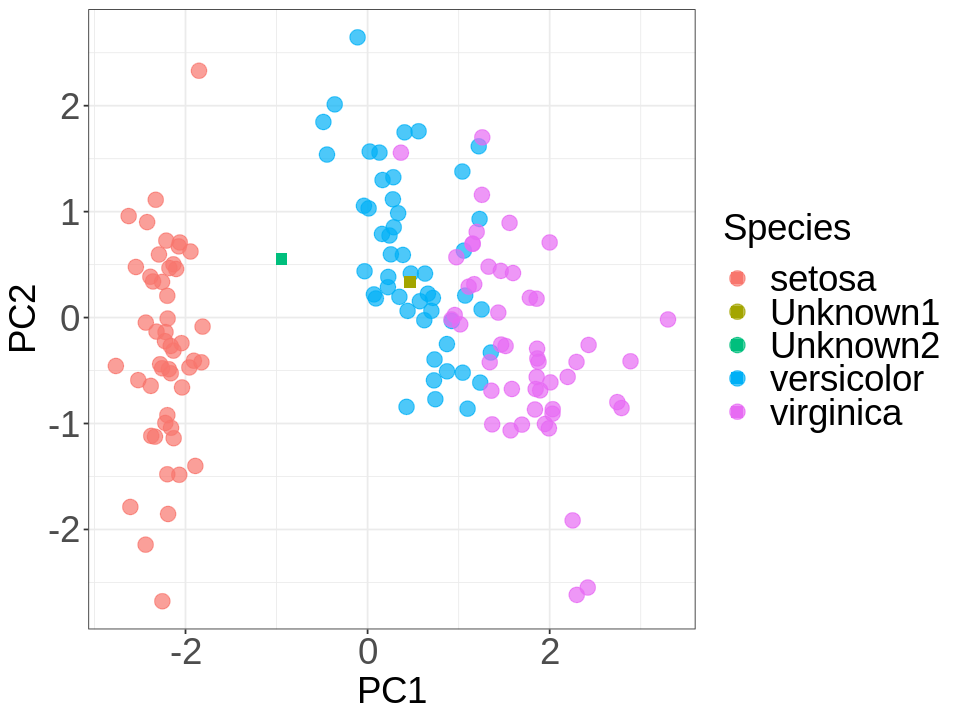

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6)

new_pca <- cbind(new_pc, Species=c('Unknown1', 'Unknown2'))
g1 + geom_point(data=new_pca, size=3, shape=15) + font_change

### **Observations**

What can you conclude from this last part?


.......

You proudly organize your observations and prepare a report for your supervisor, Charles Darwin.  Your report contains an Introduction, a detailed Methods section as well as a Results and Discussion section where you carefully summarize your most important observations and presents the relevant graph.  Finally, you also include the relevant code that would be necessary to reproduce your exploratory data analysis to your report.

You think about the rules you've created to classify an unseen flower.  You wonder if they are adequate.  You would like to use an established predictive model.  You know that you need something simple and interpretable.  


Your rules were :

```
if 0 ≤ petal_length ≤ 2 and 0 ≤ petal_width ≤ 0.7 then setosa
if 2 ≤ petal_length ≤ 5.2 and 1 ≤ petal_length ≤1.7 then versicolor
else virginica
```



# **Decision Tree**

You decide to use a supervised machine learning method known as a decision tree.  Decision tree are simple to interpret and to use. And you will be able to compare the tree to your house rules.

In fact, you think it's a good thing. You know that you should follow the Occam's razor principle, i.e. start by looking at the simplest solutions before jumping into more complex ones (or complex models).



Because you are using a machine learning approach, you probably want to apply your model to unseen data.  With almost all machine learning approaches, there is a risk of overfitting, of being very good on the data you are using to build/train your model but not very good on data that was never seen.  As if the predictive model had learned by heart the specificities of your data and not general predictive patterns that can be applied on any datasets of the same kind.

Because of this problem/risk, we need to recreate the case where you have unseen data.  To do so, we can divide the dataset into a training set and a test set.  We will train the model on the training set and evaluate it on the unseen data, the test set.

In [ ]:
# We set the random seed for reproductibility purpose
set.seed(12345)

# We select data at random to be part of the traing set
# 80% of the data will be part of the training set
train_index <- sample(1:nrow(iris), size = ceiling(0.80*nrow(iris)),replace = FALSE)

train_set <- iris[train_index,]
test_set <- iris[-train_index,]


In [ ]:
# We need to check that we have selected fairly similar numbers of flowers from each species.
# We won't be able to learn anything about setosa if we do not have setosa in our training set.
# We want 'balanced' training  and test sets.
table(train_set$Species)


    setosa versicolor  virginica 
        40         40         40 

In [ ]:
library(rpart)

# Build the decision tree
tree <- rpart(Species~., data=train_set, method="class")

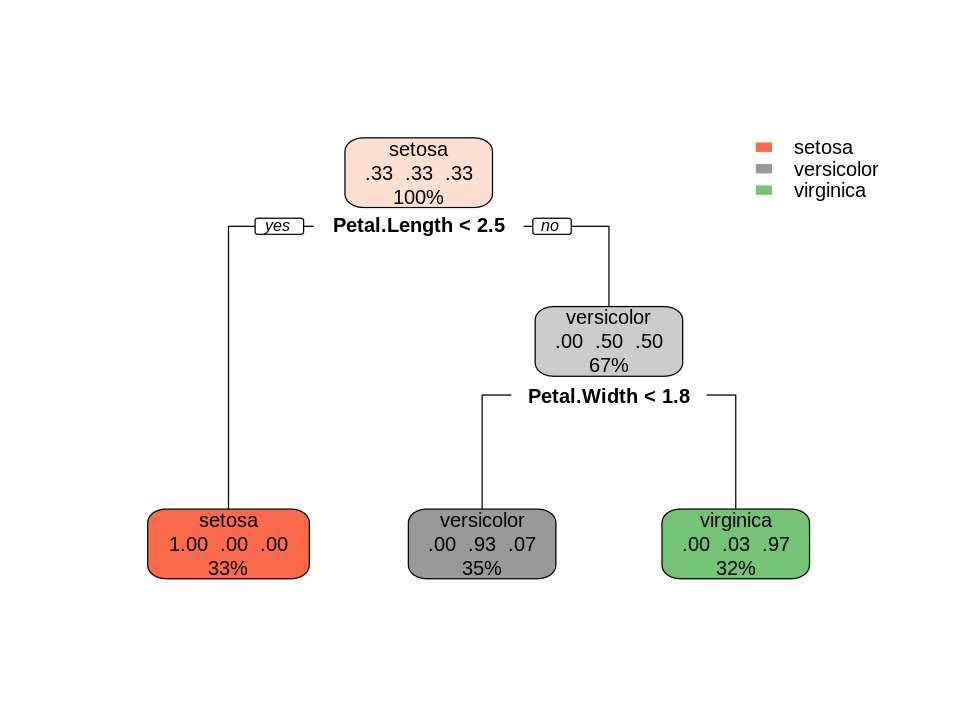

In [ ]:
library(rpart.plot)

# Plot the tree
rpart.plot(tree)

In [ ]:
# Evaluate how good the decision tree is using unseen data
real <- test_set[,'Species']
prediction <- predict(object=tree, test_set[,1:4],type="class")

In [ ]:
# We create a confusion matrix
table(real, prediction)

            prediction
real         setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          2         8

In [ ]:
accuracy <- sum(real==prediction)/length(real)
print(sprintf('Decision tree has an accuracy of %.2f percent on the test set', accuracy*100))

[1] "Decision tree has an accuracy of 93.33 percent on the test set"


### **Observations**

What can you conclude from your model?  And from your own rules?


....

# **Conclusion**

With that you are satisfied! You can be proud of yourself!

Congratulations on completing your project!  

Here are some other notebooks presenting Exploratory Data Analysis using the Iris Dataset.  These are written by people like you and me that just want to learn and/or share.

* [Analysis of Iris dataset](http://rstudio-pubs-static.s3.amazonaws.com/450733_9a472ce9632f4ffbb2d6175aaaee5be6.html)
* [Learning R on iris](https://rpubs.com/moeransm/intro-iris)
* [Iris data visualization with R](https://www.kaggle.com/antoniolopez/iris-data-visualization-with-r)
 
